# QCA Intro Notebook: Getting Started with Qiskit

<h4 style="color: red">If you find issues with anything here, please let me know so I can fix it!</h4>

If this is your first time using jupyter notebooks, the basic controls are:
1. Run a cell with `shift enter`
2. Enter cell edit mode `enter`, escape cell edit with `esc` (escape key)
4. Add a cell above `a` or below `b` (must exit edit mode first)
5. Delete a cell with `dd`

### Let's install qiskit!

In [2]:
# First we can try to import all the modules, this may take a minute or two
try:
    import qiskit as q
    from qutip import *
    import matplotlib as plt
    from qiskit.tools.monitor import job_monitor
except ImportError as e:
    # one of the modules was not installed, we can pip install the remaining modules
    !pip install -r requirements.txt
    try:
        import qiskit as q
        from qutip import *
        import matplotlib as plt
        from qiskit.tools.monitor import job_monitor
    except ImportError as e:
        # Modules cannot be imported after pip install
        print("Looks like the modules cannot be found!")

  Using cached qutip-4.5.2.tar.gz (3.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for qutip: filename=qutip-4.5.2-cp38-cp38-macosx_10_15_x86_64.whl size=5806835 sha256=fdcba9094ea5bb499128802572ec7632b8febab58f517ed282c56035b0804431
  Stored in directory: /Users/philip/Library/Caches/pip/wheels/5a/ca/2f/29082c212a1324d87df597ed69a86f38dfce4f1478a9c3c1a0
Successfully built qutip


### Now let's create an IBM Q experience account

Create an IBMid account:  [Create an IBMid](https://www.ibm.com/account/reg/signup?formid=urx-19776&target=https%3A%2F%2Fidaas.iam.ibm.com%2Fidaas%2Foidc%2Fendpoint%2Fdefault%2Fauthorize%3Fscope%3Dopenid%26response_type%3Dcode%26state%3D20200917-3ae94ed4-ab42-46c0-8e06-36fb6258e42e-3fcc2%26redirect_uri%3Dhttps%253A%252F%252Fidaas-us01a.ice.ibmcloud.com%252Fidaas%252Fmtfim%252Fsps%252Fidaas%252Flogin%252Fibmid%252Fredirect%26client_id%3DCICProdClient1)

Login to the IBM Q experience:  [IBM Quantum Experience](https://quantum-computing.ibm.com/)

### Go to the account section:

<img src="images/go_account.png" style="width: 800px">

### Copy the token:

<img src="images/get_token.png" style="width: 800px">

In [ ]:
# Put your token as a string here:
token = ""

In [4]:
## Now let's connect the account key into qiskit
q.IBMQ.save_account(token)
q.IBMQ.load_account()
provider = q.IBMQ.get_provider('ibm-q')

configrc.store_credentials:WARNING:2020-09-17 13:21:32,638: Credentials already present. Set overwrite=True to overwrite.


## Create a simple quantum circuit!

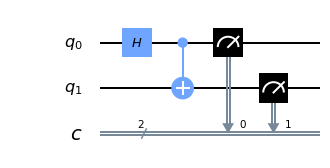

In [15]:
# Create a Quantum Circuit acting on the q register
circuit = q.QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
circuit.draw(output="mpl")

## Let's run the circuit on the simulator first!
This will simulate running the above circuit on a quantum computer

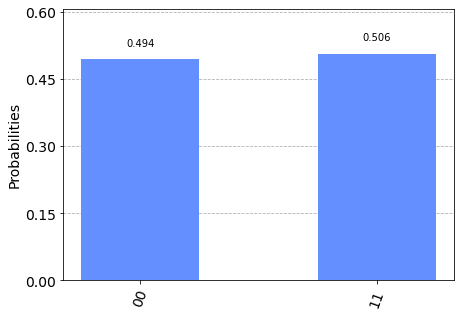

In [16]:
simulator = q.Aer.get_backend('qasm_simulator')
job = q.execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
q.visualization.plot_histogram(counts)

## Now we can run the same circuit on an acutal quantum computer

As the larger computers often have sizeable queues, I use this helper function to find the computer with the shortest wait.

In [17]:
def soonest_backend(nqbits, print_backends=False):
    status = []
    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().qubits)
        except:
            qubit_count = 0
        if print_backends:
            print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
        status.append((backend.name(), qubit_count, backend.status().pending_jobs))
    
    min_queue = min([comp[2] for comp in status if (int(comp[1]) >= nqbits)])
    for cp in status:
        if cp[2] == min_queue:
            return cp[0]

## Find machine and request job to be executed

In [23]:
# As our circuit needs 2 qubits, our soonest_backend function will take a min of 2
machine = soonest_backend(2)
print(f"Using backend: {machine}")
backend = provider.get_backend(machine)
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Using backend: ibmq_qasm_simulator
Job Status: job has successfully run


## Once the job has run you can dislay the results in a histogram

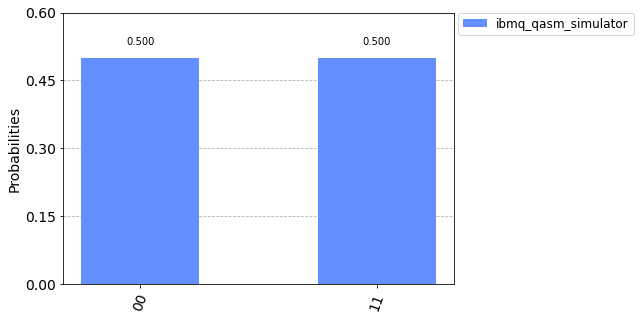

In [22]:
result = job.result()
counts = result.get_counts(circuit)

q.visualization.plot_histogram([counts], legend=[machine])

# Getting Started with Qutip

### Qutip is a package designed to display quantum information

The documentation for QuTip version 4.5 (currently the latest version) is available here: http://qutip.org/docs/latest/index.html

### The Quantum object class (Qobj)
A quantum object is a data structure that represents a the properties of quantum states and operators, it is represented in Qutip using the `Qobj` class. `Qobj` can be initialised using a matrix as shown.

In [25]:
object1 = Qobj([[1],[2],[3],[4],[5]])
object1

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]

In [26]:
k2 = basis(5, 3)
k2

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]]

In [27]:
k2.isherm

False

In [28]:
k2.data

<5x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 1 stored elements in Compressed Sparse Row format>

#### Functions operating on quantum objects
QuTip has several built-in common linear algebra type operations that one can perfrom on states or operators. For example, the Hermitian adjoint can be performed by calling the `dag` function as below. See page 18 of the Users Guide ([or this link](http://qutip.org/docs/latest/guide/guide-basics.html#functions-operating-on-qobj-class)) for a list of all functions operating on a quantum object.

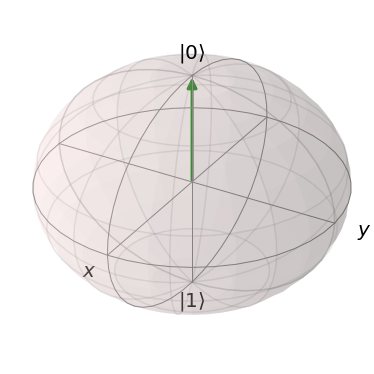

In [29]:
b = Bloch()
up = basis(2,0)
b.add_states(up)
b.show()